## Price Prediction with Python

<div class="alert alert-block alert-info">
<b>Description:</b> Pada Final Project Kelas Data Science Dasar diminta untuk memprediksi class range harga telepon genggam apakah kurang dari 1 juta, dalam range 1 - kurang dari 2 juta, diantara 2 juta hingga 3 juta dan lebih dari 3 juta berdasarkan beberapa keterangan pada kolom-kolom dataset. Diminta untuk membuat model klasifikasi yang dapat menentukan nilai pada kolom 'price_range' dengan mengubah nilainya berdasarkan ketentuan sebagai berikut: 0 : 0-<1000k, 1 : 1000k<2000k, 2 : 2000k-3000k, 3 : >3000k.
</div>

<div class="alert alert-block alert-info">
<b>Evaluation:</b> Evaluasi matriks yang di gunakan adalah fmean score, dipastikan untuk melakukan scoring metrics f1_score terhadap model yang buat.
</div>

<div class="alert alert-block alert-info">
<b>Data Description:</b> Terdapat tiga file yang digunakan pada final project ini, file train.csv berisi dataset yang memiliki kolom label digunakan untuk traning model, sedangkan file test.csv berisi dataset tanpa kolom label, yang nantinya teman-teman dapat menambahkan kolom 'price_range' berisi prediksi teman-teman sesuai ketentuan pada tab Overview. Kemudian teman-teman diminta untuk membuat dataset baru berisi kolom 'id' dan kolom 'price_range' yang diambil dari dataset test yang telah teman-teman tambahkan prediksinya, dataset baru ini yang nantinya akan dijadikan file submission. Contoh isi dari submission dapat teman-teman lihat pada file submission_sample.csv
</div>

### Importing Global Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score ,KFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

### Memproses Data yang diberikan

In [2]:
# Read Data
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')

In [3]:
data_train

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,...,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,1045,531,0,1.1,0,10,Tidak,63,0.7,189,...,145,1903,2958,17.0,1,19,0,1,0,2000k-3000k
1,937,764,1,1.2,1,1,Tidak,13,1.0,152,...,361,511,3148,18.0,7,6,1,1,0,2000k-3000k
2,1658,1812,1,1.3,1,4,Ya,42,1.0,162,...,380,1550,3338,18.0,13,11,1,1,1,>3000k
3,529,1821,0,0.9,0,9,Ya,12,0.3,114,...,97,1803,2430,7.0,4,6,1,1,1,2000k-3000k
4,895,1790,1,2.3,1,3,Ya,49,0.5,100,...,396,1980,3568,6.0,2,18,1,0,1,>3000k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,835,1224,1,1.6,0,9,Tidak,33,1.0,157,...,522,563,3796,10.0,5,13,1,1,0,>3000k
1496,1216,1158,0,0.7,1,1,Ya,29,0.7,123,...,311,1796,1542,17.0,9,15,1,0,1,1000k-<2000k
1497,1653,1190,0,2.0,1,0,Tidak,40,0.2,93,...,1399,1646,3610,13.0,7,9,0,0,1,>3000k
1498,559,1191,0,2.4,1,2,Tidak,13,0.9,169,...,179,1813,1028,14.0,6,8,1,1,1,0-<1000k


In [4]:
data_test

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,...,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,405,1454,1,0.5,1,1,Tidak,34,0.7,83,...,3,250,1033,3419,7,5,5,1,1,0
1,1190,1092,1,0.5,1,10,Tidak,11,0.5,167,...,14,468,571,737,14,4,11,0,1,0
2,1132,1524,1,1.8,1,0,Tidak,10,0.6,174,...,1,154,550,2678,16,5,13,1,0,1
3,731,1807,1,2.1,0,2,Tidak,49,0.8,125,...,10,337,1384,1906,17,13,13,0,1,1
4,1754,1086,1,1.7,1,0,Ya,43,0.2,111,...,1,56,1150,3285,11,5,17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,936,805,0,0.8,0,1,Tidak,34,0.6,88,...,2,1262,1538,3647,18,11,9,1,0,1
496,1524,1162,0,1.0,0,0,Tidak,50,0.5,104,...,10,332,866,1404,10,3,15,1,1,1
497,1415,1759,1,1.4,0,10,Ya,15,0.4,101,...,13,382,1163,2107,18,5,16,1,1,0
498,1223,514,1,1.6,0,7,Ya,37,0.1,172,...,9,956,1723,3392,12,8,5,1,1,1


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1450 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   object 
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1381 non-null   float64
 16  lebar_

In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               500 non-null    int64  
 1   daya_baterai        500 non-null    int64  
 2   bluetooth           500 non-null    int64  
 3   kecepatan_clock     500 non-null    float64
 4   dual_sim            500 non-null    int64  
 5   kamera_depan        500 non-null    int64  
 6   four_g              500 non-null    object 
 7   memori_internal     500 non-null    int64  
 8   tebal_hp            500 non-null    float64
 9   berat_hp            500 non-null    int64  
 10  jumlah_prosesor     500 non-null    int64  
 11  kamera_belakang_mp  500 non-null    int64  
 12  px_panjang          500 non-null    int64  
 13  px_lebar            500 non-null    int64  
 14  kapasitas_ram       500 non-null    int64  
 15  panjang_layar       500 non-null    int64  
 16  lebar_la

In [7]:
# Mencari data Null didalam data_test
data_test.isnull().sum()

index                 0
daya_baterai          0
bluetooth             0
kecepatan_clock       0
dual_sim              0
kamera_depan          0
four_g                0
memori_internal       0
tebal_hp              0
berat_hp              0
jumlah_prosesor       0
kamera_belakang_mp    0
px_panjang            0
px_lebar              0
kapasitas_ram         0
panjang_layar         0
lebar_layar           0
waktu_telfon          0
three_g               0
touch_screen          0
wifi                  0
dtype: int64

In [8]:
## Mencari data Null didalam data_train
data_train.isnull().sum()

index                   0
daya_baterai            0
bluetooth               0
kecepatan_clock        50
dual_sim                0
kamera_depan            0
four_g                  0
memori_internal         0
tebal_hp                0
berat_hp                0
jumlah_prosesor         0
kamera_belakang_mp      0
px_panjang              0
px_lebar                0
kapasitas_ram           0
panjang_layar         119
lebar_layar             0
waktu_telfon            0
three_g                 0
touch_screen            0
wifi                    0
price_range             0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='kecepatan_clock'>

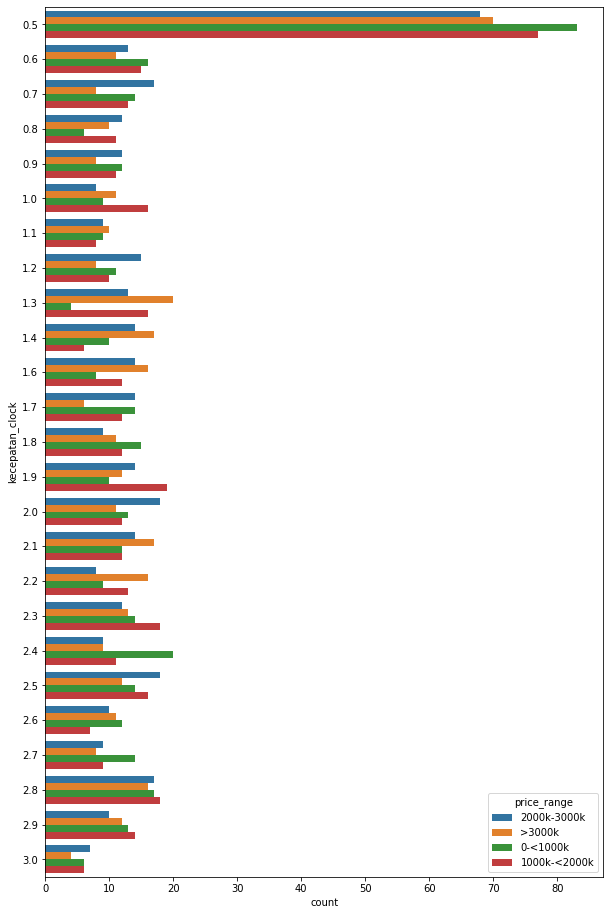

In [11]:
# Menganalisa peran kecepatan_clock dalam price_range
plt.figure(figsize=(10,16))
sns.countplot(data=data_train,y='kecepatan_clock',hue='price_range')

<AxesSubplot:xlabel='count', ylabel='panjang_layar'>

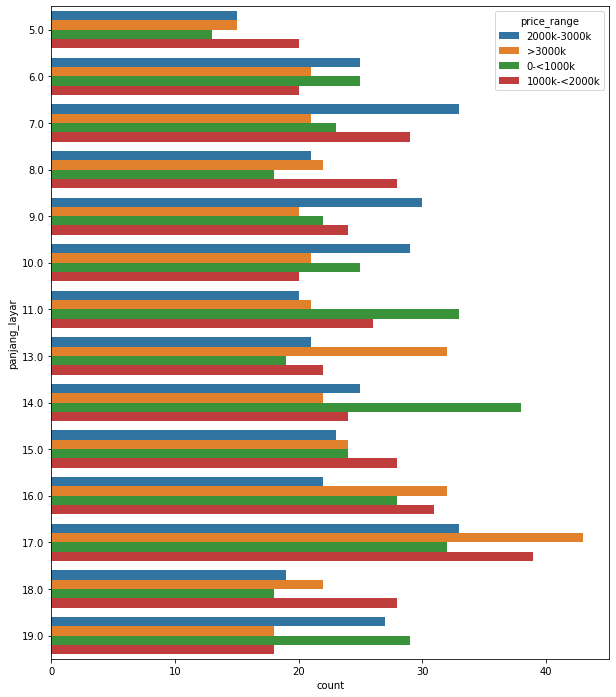

In [13]:
# Menganalisa peran panjang_layar dalam price_range
plt.figure(figsize=(10,12))
sns.countplot(data=data_train,y='panjang_layar',hue='price_range')

In [14]:
# Mengisi data yang kosong dengan metode foward fill / ffill
data_train['kecepatan_clock'] = data_train['kecepatan_clock'].fillna(method='ffill')
data_train['panjang_layar'] = data_train['panjang_layar'].fillna(method='ffill')

In [15]:
# Mengecek apakah masih ada data yang bernilai Null / Kosong
data_train.isnull().sum()

index                 0
daya_baterai          0
bluetooth             0
kecepatan_clock       0
dual_sim              0
kamera_depan          0
four_g                0
memori_internal       0
tebal_hp              0
berat_hp              0
jumlah_prosesor       0
kamera_belakang_mp    0
px_panjang            0
px_lebar              0
kapasitas_ram         0
panjang_layar         0
lebar_layar           0
waktu_telfon          0
three_g               0
touch_screen          0
wifi                  0
price_range           0
dtype: int64

In [16]:
data_train.describe()

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1005.632667,1233.106667,0.488000,1.550400,0.514000,4.188000,31.952667,0.501467,139.175333,4.526667,9.790667,656.468000,1263.966667,2101.494667,12.405333,5.840000,11.031333,0.760000,0.494667,0.514000
std,575.773812,441.849570,0.500023,0.833837,0.499971,4.243976,18.323853,0.288352,35.087225,2.274952,6.054250,445.909214,434.283017,1073.742748,4.344992,4.407647,5.479876,0.427226,0.500138,0.499971
min,0.000000,501.000000,0.000000,0.500000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,509.750000,840.750000,0.000000,0.700000,0.000000,1.000000,16.000000,0.200000,108.000000,3.000000,4.000000,293.000000,882.000000,1202.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1005.000000,1222.500000,0.000000,1.600000,1.000000,3.000000,31.000000,0.500000,139.000000,4.000000,10.000000,580.500000,1263.000000,2107.000000,13.000000,5.000000,11.000000,1.000000,0.000000,1.000000
75%,1509.250000,1608.500000,1.000000,2.300000,1.000000,7.000000,48.000000,0.800000,169.000000,7.000000,15.000000,961.000000,1645.250000,2982.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1998.000000,1.000000,3.000000,1.000000,16.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1920.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='count', ylabel='jumlah_prosesor'>

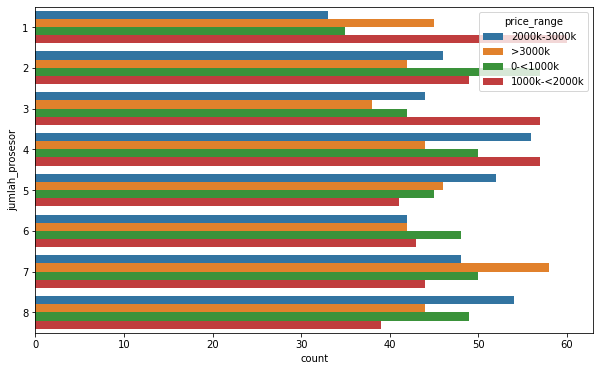

In [18]:
# Menganalisa peran jumlah prosessor dalam price_range
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train,y='jumlah_prosesor',hue='price_range')

<AxesSubplot:xlabel='count', ylabel='kamera_belakang_mp'>

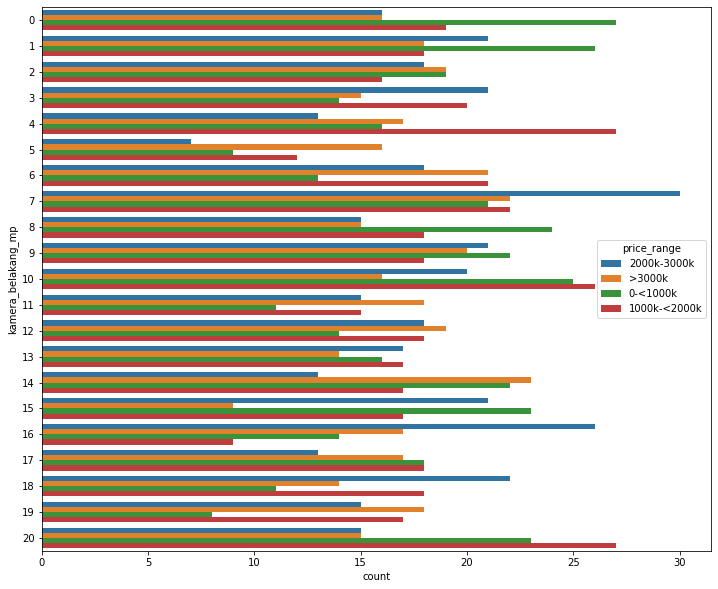

In [22]:
# Menganalisa peran kamera_belakang_mp dalam price_range
plt.figure(figsize=(12, 10))
sns.countplot(data=data_train,y='kamera_belakang_mp',hue='price_range')

<AxesSubplot:xlabel='kamera_depan', ylabel='kamera_belakang_mp'>

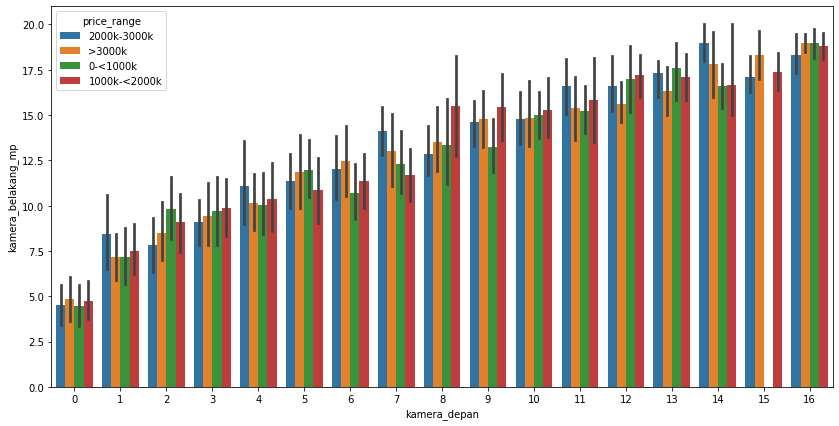

In [23]:
# Menganalisa peran kamera_depan dan kamera_belakang terhadap price_range
plt.figure(figsize=(14, 7))
sns.barplot(data=data_train,x='kamera_depan',y='kamera_belakang_mp',hue='price_range')

<AxesSubplot:xlabel='four_g', ylabel='wifi'>

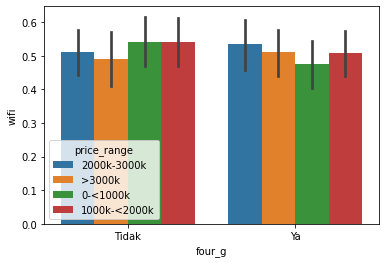

In [26]:
# Menganalisa peran four_g dan wifi terhadap price_range
plt.figure(figsize=(6, 4))
sns.barplot(data=data_train,x='four_g',y='wifi',hue='price_range')

<AxesSubplot:xlabel='jumlah_prosesor', ylabel='memori_internal'>

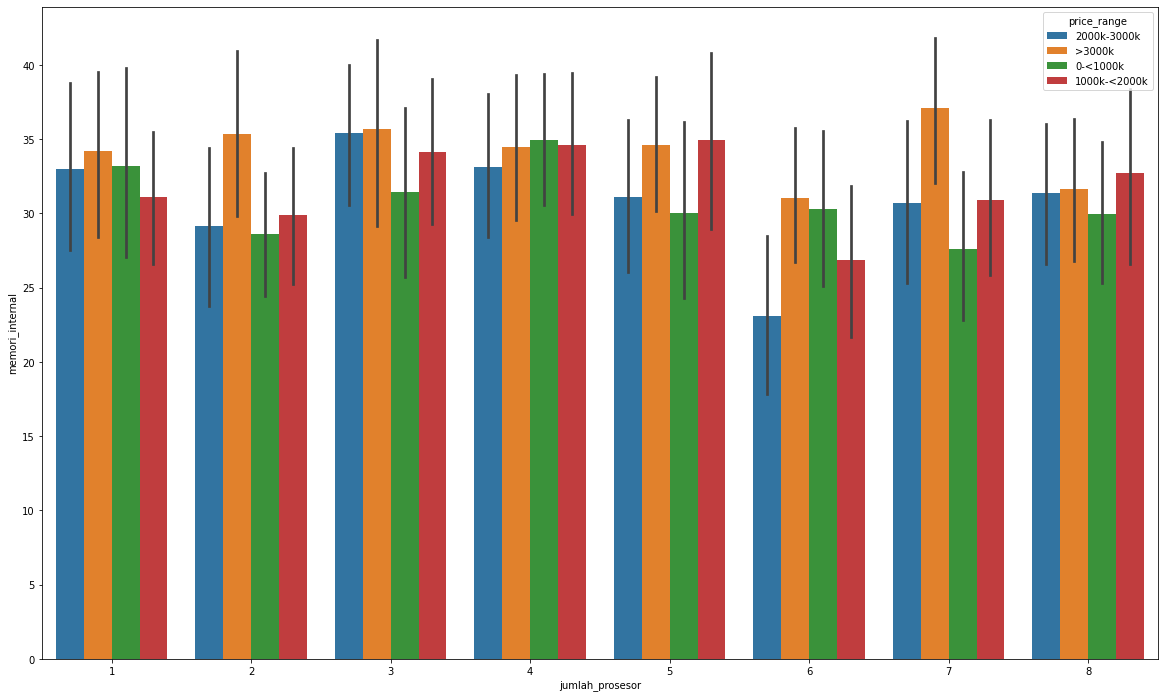

In [27]:
# Menganalisa memori_internal dan jumlah prosesor terhadap price_range
plt.figure(figsize=(20,12))
sns.barplot(data=data_train,y='memori_internal',x='jumlah_prosesor',hue='price_range')

<AxesSubplot:xlabel='kecepatan_clock', ylabel='daya_baterai'>

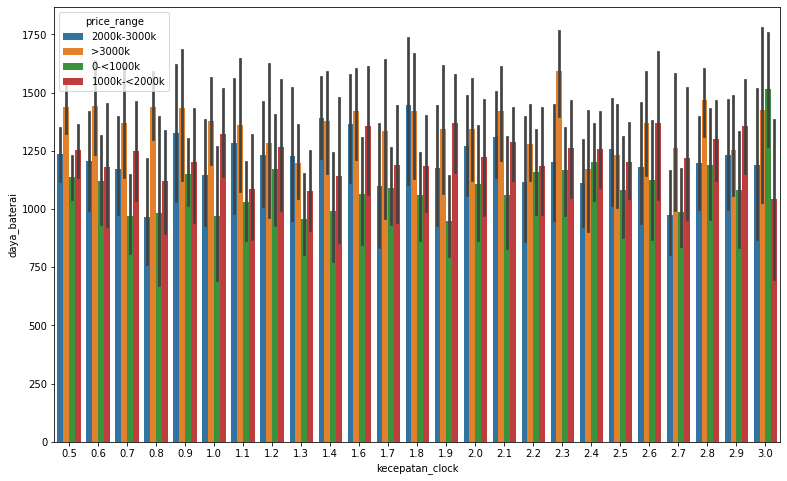

In [28]:
# Menganalisa peran kecepatan_clock dan daya_baterai terhadap price_range
plt.figure(figsize=(13,8))
sns.barplot(data=data_train,x='kecepatan_clock',y='daya_baterai',hue='price_range')

In [29]:
# Me-replace data yang masih memiliki nilai obj ke dalam int
price_data = [data_train , data_test]
four_G = {'Ya':1 , 'Tidak':0}
range = {'0-<1000k': 0 , '1000k-<2000k':1 , '2000k-3000k': 2 , '>3000k':3 }
for data in price_data :
  data['four_g'] = data['four_g'].replace(four_G)

data_train['price_range'] = data_train['price_range'].replace(range)

In [30]:
#Mengecek pergantian data setelah di replace
data_train.head()

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,...,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,1045,531,0,1.1,0,10,0,63,0.7,189,...,145,1903,2958,17.0,1,19,0,1,0,2
1,937,764,1,1.2,1,1,0,13,1.0,152,...,361,511,3148,18.0,7,6,1,1,0,2
2,1658,1812,1,1.3,1,4,1,42,1.0,162,...,380,1550,3338,18.0,13,11,1,1,1,3
3,529,1821,0,0.9,0,9,1,12,0.3,114,...,97,1803,2430,7.0,4,6,1,1,1,2
4,895,1790,1,2.3,1,3,1,49,0.5,100,...,396,1980,3568,6.0,2,18,1,0,1,3


In [31]:
data_test.head()

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,...,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,405,1454,1,0.5,1,1,0,34,0.7,83,...,3,250,1033,3419,7,5,5,1,1,0
1,1190,1092,1,0.5,1,10,0,11,0.5,167,...,14,468,571,737,14,4,11,0,1,0
2,1132,1524,1,1.8,1,0,0,10,0.6,174,...,1,154,550,2678,16,5,13,1,0,1
3,731,1807,1,2.1,0,2,0,49,0.8,125,...,10,337,1384,1906,17,13,13,0,1,1
4,1754,1086,1,1.7,1,0,1,43,0.2,111,...,1,56,1150,3285,11,5,17,1,1,0


### Training Data dan Modeling

In [32]:
# Menentukan nilai x dan y dalam melakukan training data
x = data_train.drop(['index','price_range'],axis=1)
y = data_train['price_range']

In [33]:
# Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, 
test_size=0.25, random_state=0)

In [34]:
# Mengecek apakah data x_train sesuai yang diharapkan
x_train

,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
247,1394,1,0.9,1,10,1,62,0.3,175,5,13,1010,1565,473,11.0,1,20,1,1,0
678,1604,1,1.7,0,2,0,33,1.0,191,8,5,134,939,916,13.0,10,12,0,1,1
722,1673,0,2.8,1,7,0,9,0.1,187,3,10,65,734,3669,9.0,1,10,1,0,1
590,1375,0,0.5,1,2,1,35,0.1,194,2,3,227,772,1947,15.0,13,15,1,1,1
186,591,0,2.1,1,16,1,16,0.5,196,7,20,952,1726,704,14.0,5,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1832,0,0.7,0,2,0,2,0.6,90,7,6,186,654,2978,18.0,7,18,0,0,0
835,1925,0,3.0,1,0,1,16,0.8,175,8,11,983,1087,2173,7.0,3,19,1,1,0
1216,1312,0,1.3,0,5,1,10,0.6,163,2,9,95,893,3941,6.0,2,13,1,1,1
559,999,0,2.9,1,11,1,64,0.2,199,4,19,1397,1616,2593,14.0,11,16,1,1,0


In [35]:
# Mengecek apakah data y_train sesuai yang diharapkan
y_train

247     0
678     0
722     3
590     1
186     0
       ..
763     2
835     2
1216    3
559     2
684     2
Name: price_range, Length: 1125, dtype: int64

In [36]:
# Pemilihan model yang cocok untuk data_train
algo = []
algo.append(('LR',LogisticRegression()))
algo.append(('LDA',LinearDiscriminantAnalysis()))
algo.append(('KNN',KNeighborsClassifier()))
algo.append(('DTS',DecisionTreeClassifier()))
algo.append(('Gauss',GaussianNB()))
algo.append(('GBC',GradientBoostingClassifier()))
algo.append(('RFC',RandomForestClassifier()))
algo.append(('MPL',MLPClassifier()))
algo.append(('SVC',SVC()))
algo.append(('Ada',AdaBoostClassifier()))
algo.append(('QDA',QuadraticDiscriminantAnalysis()))

result = []
names = []
for name , algorit in algo :
  kfold = KFold(n_splits=20,random_state=10,shuffle=True)
  cv_result = cross_val_score(algorit,x_train,y_train,cv=kfold,scoring='accuracy')
  result.append(cv_result)
  names.append(name)
  info = "%s: %f (%f)" % (name, cv_result.mean(), cv_result.std())
  print(info)

LR: 0.621335 (0.069035)
LDA: 0.931642 (0.034962)
KNN: 0.917293 (0.028958)
DTS: 0.793781 (0.046559)
Gauss: 0.799013 (0.055631)
GBC: 0.872885 (0.047263)
RFC: 0.853211 (0.062086)
MPL: 0.614176 (0.064725)
SVC: 0.940398 (0.034930)
Ada: 0.647149 (0.094033)
QDA: 0.906626 (0.042514)


In [37]:
# Klasifikasi kembali Model dengan 3 nilai tertinggi
# LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train,y_train)
predLDA = LDA.predict(x_test)
accLDA = accuracy_score(y_test , predLDA)
print ('Accuracy model {:.6f} '.format(accLDA))

Accuracy model 0.946667 


In [38]:
print (classification_report(y_test, predLDA))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.90      0.95      0.92        93
           2       0.93      0.93      0.93       107
           3       1.00      0.94      0.97        84

    accuracy                           0.95       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.95      0.95       375



In [39]:
# KNN
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN = KNN.predict(x_test)
accKNN = accuracy_score(y_test , predKNN)
print ('Accuracy model {:.6f} '.format(accKNN))

Accuracy model 0.930667 


In [40]:
print (classification_report(y_test, predKNN))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        91
           1       0.92      0.91      0.92        93
           2       0.89      0.90      0.89       107
           3       0.94      0.93      0.93        84

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375



In [41]:
# Model yang dipilih berdasarkan Accuracy tertinggi dan F_score
# Serta melakukan analisis model attribute untuk mengaplikasikanya kedalam data_train
# SVC
svc = SVC(gamma='auto',kernel='linear',C=0.000125)
svc.fit(x_train,y_train)
predSVC = svc.predict(x_test)
accSVC = accuracy_score(y_test,predSVC)
print ('Accuracy model {:.6f} '.format(accSVC))

Accuracy model 0.981333 


In [42]:
# Memvisualisasi prediksi data
confusion_matrix(y_test , predSVC)

array([[ 91,   0,   0,   0],
       [  1,  88,   4,   0],
       [  0,   1, 105,   1],
       [  0,   0,   0,  84]], dtype=int64)

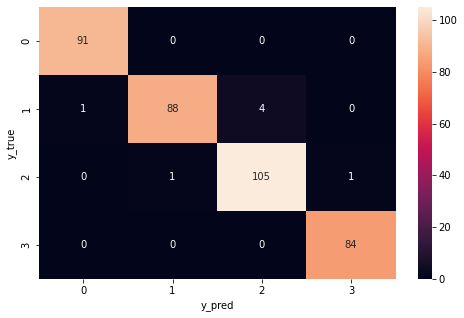

In [43]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predSVC), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [44]:
print (classification_report(y_test, predSVC))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       0.99      0.95      0.97        93
           2       0.96      0.98      0.97       107
           3       0.99      1.00      0.99        84

    accuracy                           0.98       375
   macro avg       0.98      0.98      0.98       375
weighted avg       0.98      0.98      0.98       375



In [45]:
# Klasifikasi Model dengan 3 nilai Terendah
# MPLClasifier
MPL = MLPClassifier()
MPL.fit(x_train,y_train)
predMPL = MPL.predict(x_test)
accMPL = accuracy_score(y_test , predMPL)
print ('Accuracy model {:.6f} '.format(accMPL))

Accuracy model 0.674667 


In [46]:
print (classification_report(y_test, predMPL))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        91
           1       0.61      0.53      0.57        93
           2       0.64      0.50      0.56       107
           3       0.65      0.81      0.72        84

    accuracy                           0.67       375
   macro avg       0.67      0.69      0.67       375
weighted avg       0.67      0.67      0.67       375



In [47]:
# LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
accLR = accuracy_score(y_test , predLR)
print ('Accuracy model {:.6f} '.format(accLR))

Accuracy model 0.597333 


In [48]:
print (classification_report(y_test, predLR))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        91
           1       0.49      0.60      0.54        93
           2       0.46      0.33      0.38       107
           3       0.62      0.73      0.67        84

    accuracy                           0.60       375
   macro avg       0.60      0.61      0.60       375
weighted avg       0.60      0.60      0.59       375



In [49]:
#Gaussian
Gauss = GaussianNB()
Gauss.fit(x_train,y_train)
predGauss = Gauss.predict(x_test)
accGauss = accuracy_score(y_test , predGauss)
print ('Accuracy model {:.6f} '.format(accGauss))

Accuracy model 0.810667 


In [50]:
print (classification_report(y_test, predGauss))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        91
           1       0.76      0.73      0.75        93
           2       0.73      0.72      0.73       107
           3       0.85      0.86      0.85        84

    accuracy                           0.81       375
   macro avg       0.81      0.82      0.81       375
weighted avg       0.81      0.81      0.81       375



### Menerapkan Model yang telah di buat ke dalam Data_test dan melakukan print ke dalam bentuk CSV

In [51]:
# Apply Model to Test data 
test_data = data_test.drop('index',axis =1)
apply_model = svc.predict(test_data)

In [52]:
# Memasukan data yang telah di terapkan ke dalam dataframe sesuai dengan ketentuan Submission yang diminta
a = {'index':data_test['index'].values,'price_range':apply_model}
tested_data = pd.DataFrame.from_dict(a,orient='index')
trans = tested_data.T
trans.head()

,index,price_range
0,405,3
1,1190,0
2,1132,2
3,731,2
4,1754,2


In [53]:
# Melakukan print dataframe ke dalam bentuk .csv
trans.to_csv('Submission.csv',index='false')

In [55]:
# Melihat data submission yang diharapkan
data_sample = pd.read_csv('submission_sample.csv')
data_sample

,index,price_range
0,405,3
1,1190,0
2,1132,2


In [56]:
# Hasil data dari pemodelan
data_hasil = pd.read_csv('Submission.csv')
data_hasil

,Unnamed: 0,index,price_range
0,0,405,3
1,1,1190,0
2,2,1132,2
3,3,731,2
4,4,1754,2
...,...,...,...
495,495,936,3
496,496,1524,0
497,497,1415,2
498,498,1223,3
